# 로지스틱 회귀분석
* odds<br> $ odds = {p \over 1-p}  $
<br><br>
* 로짓변환<br>
$ logit =  \log{p \over 1-p}  $

* 시그모이드 함수 로 변환되어 0,1의 분류 분석 가능

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
X = data[['Pclass', 'Sex', 'Age']]
y = data['Survived']

In [14]:
X = pd.get_dummies(X, drop_first=True)
X['Age'] = X['Age'].fillna('29')
X

,Pclass,Age,Sex_male
0,3,22.0,True
1,1,38.0,False
2,3,26.0,False
3,1,35.0,False
4,3,35.0,True
...,...,...,...
886,2,27.0,True
887,1,19.0,False
888,3,29,False
889,1,26.0,True


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    891 non-null    int64 
 1   Age       891 non-null    object
 2   Sex_male  891 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 14.9+ KB


In [18]:
X['Age'] = X['Age'].astype(int)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Age       891 non-null    int32
 2   Sex_male  891 non-null    bool 
dtypes: bool(1), int32(1), int64(1)
memory usage: 11.4 KB


In [21]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

In [25]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
pred = lg.predict(X_test)
print("accuracy_score", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print("roc_auc_score", roc_auc_score(y_test, pred))

accuracy_score 0.7597765363128491
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       108
           1       0.73      0.62      0.67        71

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179

roc_auc_score 0.7357850808555034


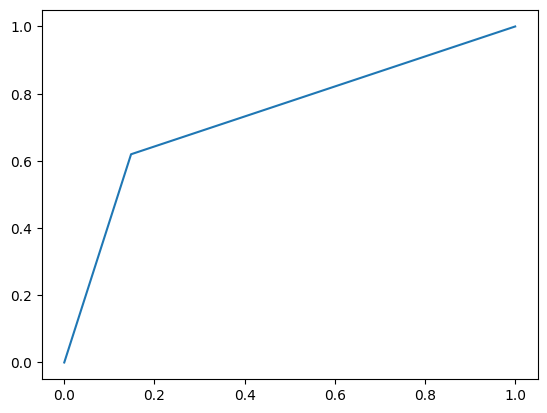

In [26]:
fper, tper, _ = roc_curve(y_test, pred)
plt.plot(fper, tper)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

In [35]:
X_train_scaled

array([[1.    , 0.3625, 1.    ],
       [0.5   , 0.45  , 0.    ],
       [1.    , 0.3375, 0.    ],
       ...,
       [0.5   , 0.3625, 1.    ],
       [0.5   , 0.025 , 1.    ],
       [1.    , 0.3625, 1.    ]])

In [28]:
import statsmodels.api as sm 

In [36]:
lg2 = sm.GLM(y_train, X_train_scaled, family=sm.families.Binomial())
res = lg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -358.18
Date:                Mon, 02 Sep 2024   Deviance:                       716.37
Time:                        14:48:34   Pearson chi2:                     778.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2757
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6416      0.171     -3.752      0.000      -0.977      -0.306
x2             2.6895      0.366      7.355      0.000       1.973       3.406
x3            -2.2544      0.195    -11.553      0.000      -2.637      -1.872
==============================================================================
"""

In [37]:
# 상수항 추가
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [38]:
model = sm.Logit(y_train, X_train_scaled).fit()
pred = model.predict(X_test_scaled)
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.435826
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      708
Method:                           MLE   Df Model:                            3
Date:                Mon, 02 Sep 2024   Pseudo R-squ.:                  0.3440
Time:                        15:03:00   Log-Likelihood:                -310.31
converged:                       True   LL-Null:                       -473.03
Covariance Type:            nonrobust   LLR p-value:                 3.097e-70
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4584      0.398      8.680      0.000       2.677       4.239
x1            -2.3657      0.

In [47]:
pred = np.round(pred)

In [48]:
print(accuracy_score(y_test, pred))

0.770949720670391


In [49]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       108
           1       0.77      0.61      0.68        71

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.77      0.76       179

